<a href="https://colab.research.google.com/github/pachterlab/GCCP_2022/blob/monod-integration/standalone_monod_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone --branch nn-integration https://github.com/pachterlab/monod.git

Cloning into 'monod'...
remote: Enumerating objects: 826, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 826 (delta 88), reused 92 (delta 73), pack-reused 680
Receiving objects: 100% (826/826), 2.24 MiB | 10.60 MiB/s, done.
Resolving deltas: 100% (461/461), done.


In [2]:
!wget https://github.com/pachterlab/monod_examples/raw/dev/sample_data/allen_C01_gaba.tar.gz

--2023-04-09 04:37:29--  https://github.com/pachterlab/monod_examples/raw/dev/sample_data/allen_C01_gaba.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/monod_examples/dev/sample_data/allen_C01_gaba.tar.gz [following]
--2023-04-09 04:37:29--  https://raw.githubusercontent.com/pachterlab/monod_examples/dev/sample_data/allen_C01_gaba.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29515422 (28M) [application/octet-stream]
Saving to: ‘allen_C01_gaba.tar.gz’

allen_C01_gaba.tar. 100%[===================>]  28.15M   117MB/s    in 0.2s    

2023-04-09 04:37:30 (117 MB/s) - ‘al

In [3]:
!wget https://github.com/pachterlab/monod_examples/raw/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1

--2023-04-09 04:37:30--  https://github.com/pachterlab/monod_examples/raw/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pachterlab/monod_examples/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1 [following]
--2023-04-09 04:37:30--  https://raw.githubusercontent.com/pachterlab/monod_examples/dev/polyA_ref/gg_200524_mouse_genome_polyA_cum_1
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7396866 (7.1M) [text/plain]
Saving to: ‘gg_200524_mouse_genome_polyA_cum_1’

gg_200524_mouse_gen 100%[===================>]   7.05M  --.-KB/s    in 0.1s    

2023

In [4]:
!pip install numdifftools pytz anndata loompy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 850.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52035 sha256=3ddb7d7d881c4aafa016095835501244d338cc9a84ac7c6e7347c1ce0801d093
  Stored in directory: /root/.cache/pip/wheels/d9/b5/43/cab70cefd40f17c3c39ba18d115ee28b76c6a076dee5abda6e
Successfully built loompy


In [5]:
!tar -xvzf allen_C01_gaba.tar.gz

allen_C01_gaba.loom


In [6]:
import os

In [7]:
import sys
sys.path.insert(0, os.getcwd()+'/monod/src/')
import monod
from monod import preprocess, extract_data, cme_toolbox, inference, analysis


Using device:  cpu


In [8]:
# dataset_meta = ['allen_B08']
dataset_meta = ['allen_C01_gaba']
dataset_names = [x for x in dataset_meta ]  
raw_data_locations = [x for x in dataset_meta]
transcriptome_filepath = './gg_200524_mouse_genome_polyA_cum_1'

spliced_layer = 'spliced'
unspliced_layer = 'unspliced'
gene_attr = 'gene_name'
cell_attr = 'barcode'

attribute_names=[(unspliced_layer,spliced_layer),gene_attr,cell_attr]

loom_filepaths = ['./'+x+'.loom' for x in raw_data_locations] 
n_datasets = len(loom_filepaths)


In [9]:
loom_filepaths

['./allen_C01_gaba.loom']

In [10]:
!mkdir -p monod_demo_fits

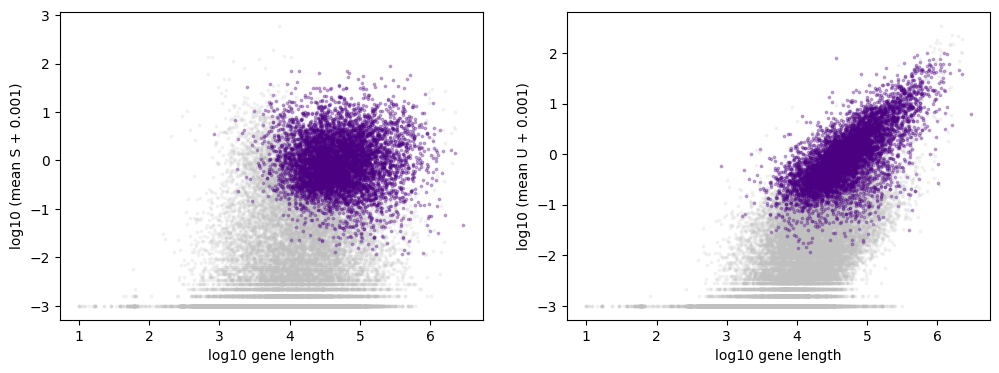

In [11]:
dir_string,dataset_strings = monod.preprocess.construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./monod_demo_fits',meta='allen_noisefree',batch_id=1,\
                                             n_genes=200,exp_filter_threshold=None,creator='gccp',datestring='nodate')


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


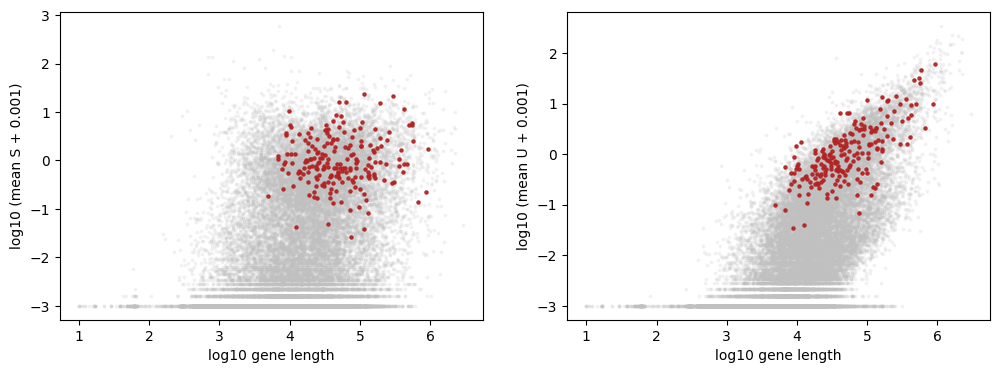

In [12]:
i=0
search_data = monod.extract_data.extract_data(loom_filepaths[i], transcriptome_filepath, dataset_names[i],
                dataset_strings[i], dir_string, dataset_attr_names=attribute_names)


In [13]:
print(dir_string)
print(dataset_strings)


./monod_demo_fits/gccp_nodate_026_allen_noisefree_1
['./monod_demo_fits/gccp_nodate_026_allen_noisefree_1/allen_C01_gaba']


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
search_data = monod.analysis.load_search_data(dataset_strings[0]+'/raw.sd')


In [15]:
result_strings = []
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
phys_lb = [-1.0, -1.8, -1.8 ]
phys_ub = [4.2, 2.5, 3.5]
samp_lb = [1,1]
samp_ub = [1,1]
gridsize = [1,1]


In [16]:
i = 0
fitmodel_fq = monod.cme_toolbox.CMEModel('Bursty','None')
fitmodel_qv = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='quad_vec')
fitmodel_nn = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn')
fitmodel_nn10 = monod.cme_toolbox.CMEModel('Bursty','None',quad_method='nn_10')

inference_parameters_fq = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
            dataset_strings[i],fitmodel_fq,use_lengths = False,
            gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})
inference_parameters_qv = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
            dataset_strings[i],fitmodel_qv,use_lengths = False,
            gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})
inference_parameters_nn = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
            dataset_strings[i],fitmodel_nn,use_lengths = False,
            gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})
inference_parameters_nn10 = monod.inference.InferenceParameters(phys_lb,phys_ub,samp_lb,samp_ub,gridsize,\
            dataset_strings[i],fitmodel_nn10,use_lengths = False,
            gradient_params = {'max_iterations':15,'init_pattern':'moments','num_restarts':1})


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
grad_inference_fq = monod.inference.GradientInference(inference_parameters_fq, fitmodel_fq, search_data, 0)
grad_inference_qv = monod.inference.GradientInference(inference_parameters_qv, fitmodel_qv, search_data, 0)
grad_inference_nn = monod.inference.GradientInference(inference_parameters_nn, fitmodel_nn, search_data, 0)
grad_inference_nn10 = monod.inference.GradientInference(inference_parameters_nn10, fitmodel_nn, search_data, 0)


In [18]:
N=100


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
gind = 0
samp=None
p=grad_inference_fq.param_MoM[gind]
limits = search_data.M[:,gind]
# limits = search_data.M[:,gind]+100
data = search_data.hist[gind]


In [20]:
search_data.M[:,gind]


array([14, 18])

In [21]:
import numpy as np
import matplotlib.pyplot as plt


Text(0, 0.5, 'nnNB result')

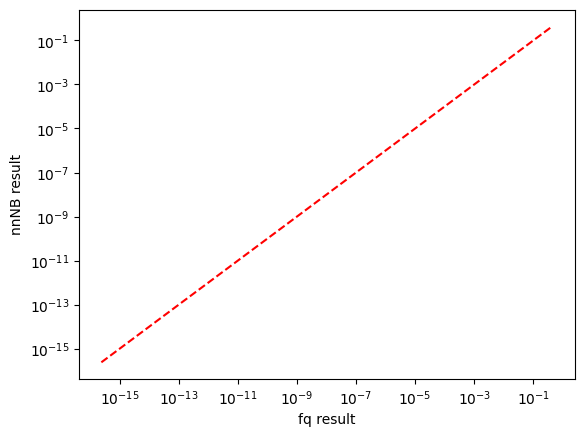

In [22]:
x=fitmodel_fq.eval_model_pss(p, limits, samp).flatten()
y=fitmodel_nn.eval_model_pss(p, limits, samp).flatten()
plt.scatter(x,y,10,'k',alpha=0.3)
xl = [x.min(),x.max()]
plt.plot(xl,xl,'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('fq result')
plt.ylabel('nnNB result')


In [23]:
y

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [24]:
x=fitmodel_fq.eval_model_pss(p, limits, samp).flatten()
y=fitmodel_nn10.eval_model_pss(p, limits, samp).flatten()
plt.scatter(x,y,10,'k',alpha=0.3)
xl = [x.min(),x.max()]
plt.plot(xl,xl,'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('fq result')
plt.ylabel('nn10 result')


TypeError: ignored

In [ ]:
x=fitmodel_fq.eval_model_pss(p, limits, samp).flatten()
y=fitmodel_qv.eval_model_pss(p, limits, samp).flatten()
plt.scatter(x,y,10,'k',alpha=0.3)
xl = [x.min(),x.max()]
plt.plot(xl,xl,'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('fq result')
plt.ylabel('qv result')


In [25]:
search_data.layers.shape

(2, 200, 1704)

In [26]:
data = search_data.layers[:,gind,:]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
hist = search_data.hist[gind]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# hist

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-189.78478663010623


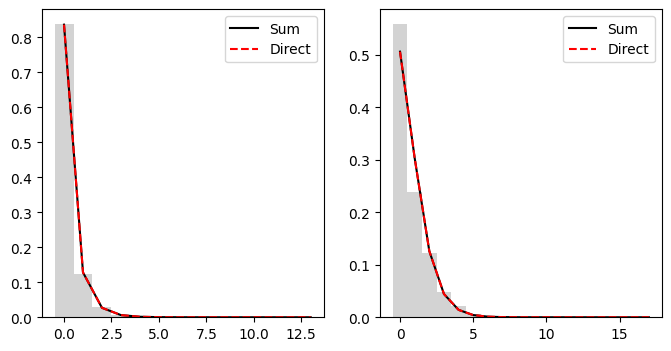

In [44]:
fm = fitmodel_fq

fig1,ax1=plt.subplots(1,2,figsize=(8,4))
bins = np.arange(limits[0]-5)-0.5
ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

Pss = fm.eval_model_pss(p, limits, samp)
ax1[0].plot(Pss.sum(1),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [limits[0],1], samp)
ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
ax1[0].legend()

Pss = fm.eval_model_pss(p, limits, samp)
ax1[1].plot(Pss.sum(0),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
ax1[1].legend()

print(fm.eval_model_logL(p,limits,samp,hist))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-189.78478560065463


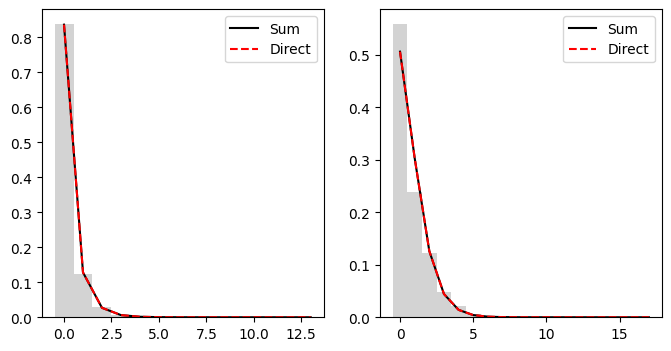

In [45]:
fm = fitmodel_qv

fig1,ax1=plt.subplots(1,2,figsize=(8,4))
bins = np.arange(limits[0]-5)-0.5
ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

Pss = fm.eval_model_pss(p, limits, samp)
ax1[0].plot(Pss.sum(1),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [limits[0],1], samp)
ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
ax1[0].legend()

Pss = fm.eval_model_pss(p, limits, samp)
ax1[1].plot(Pss.sum(0),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
ax1[1].legend()

print(fm.eval_model_logL(p,limits,samp,hist))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


nan


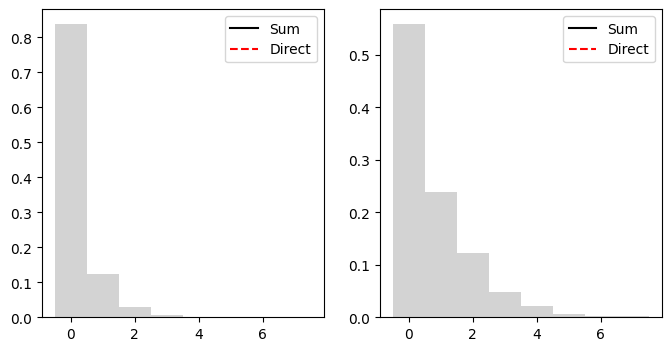

In [46]:
fm = fitmodel_nn

fig1,ax1=plt.subplots(1,2,figsize=(8,4))
bins = np.arange(limits[0]-5)-0.5
ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

Pss = fm.eval_model_pss(p, limits, samp)
ax1[0].plot(Pss.sum(1),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [limits[0],1], samp)
ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
ax1[0].legend()

Pss = fm.eval_model_pss(p, limits, samp)
ax1[1].plot(Pss.sum(0),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
ax1[1].legend()

print(fm.eval_model_logL(p,limits,samp,hist))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: ignored

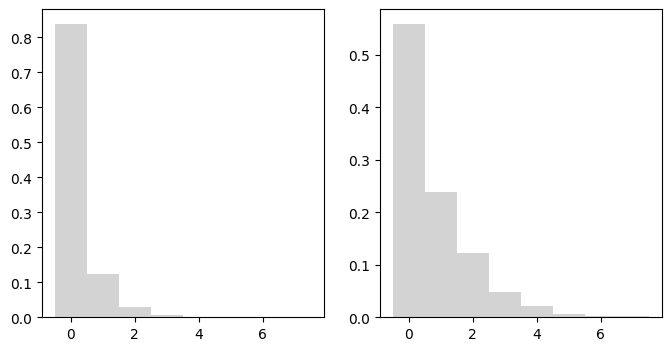

In [47]:
fm = fitmodel_nn10

fig1,ax1=plt.subplots(1,2,figsize=(8,4))
bins = np.arange(limits[0]-5)-0.5
ax1[0].hist(data[0],bins,density=True,facecolor='lightgray')
ax1[1].hist(data[1],bins,density=True,facecolor='lightgray')

Pss = fm.eval_model_pss(p, limits, samp)
ax1[0].plot(Pss.sum(1),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [limits[0],1], samp)
ax1[0].plot(Pss.squeeze(),'r--',label='Direct')
ax1[0].legend()

Pss = fm.eval_model_pss(p, limits, samp)
ax1[1].plot(Pss.sum(0),'k-',label='Sum')
Pss = fm.eval_model_pss(p, [1,limits[1]], samp)
ax1[1].plot(Pss.squeeze(),'r--',label='Direct')
ax1[1].legend()

print(fm.eval_model_logL(p,limits,samp,hist))